In [4]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

#python -m pip install pandas
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")

In [7]:
display(df.head())

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [10]:
df.shape

(1034, 6)

In [12]:
df.isnull().values.any()

True

In [13]:
df = df.dropna()
df.isnull().values.any()

False

In [15]:
df.shape

(1033, 6)

In [16]:
#clean
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [19]:
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


In [22]:
#What about positions? What can we infer about a typical player from different positions?
df_positions = df.groupby("Position").median()
df_positions.reset_index(inplace=True)
df_positions

C:\Users\vrsan\AppData\Local\Temp/ipykernel_21148/3639923337.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_positions = df.groupby("Position").median()


,Position,Height,Weight,Age
0,Catcher,73.0,205.0,30.060
1,Designated_Hitter,74.5,224.5,29.200
2,First_Baseman,74.0,220.0,28.800
3,Outfielder,73.0,200.0,28.140
4,Relief_Pitcher,74.0,200.0,27.560
5,Second_Baseman,72.0,185.0,28.435
6,Shortstop,72.0,180.0,27.800
7,Starting_Pitcher,74.5,205.0,27.390
8,Third_Baseman,73.0,200.0,27.900


In [24]:
#python -m pip install seaborn
#python -m pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

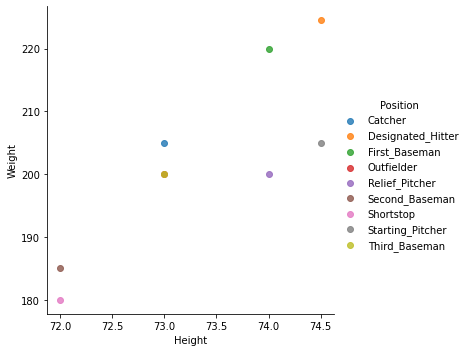

In [25]:
sns.lmplot(x="Height", y="Weight",data=df_positions, hue="Position")

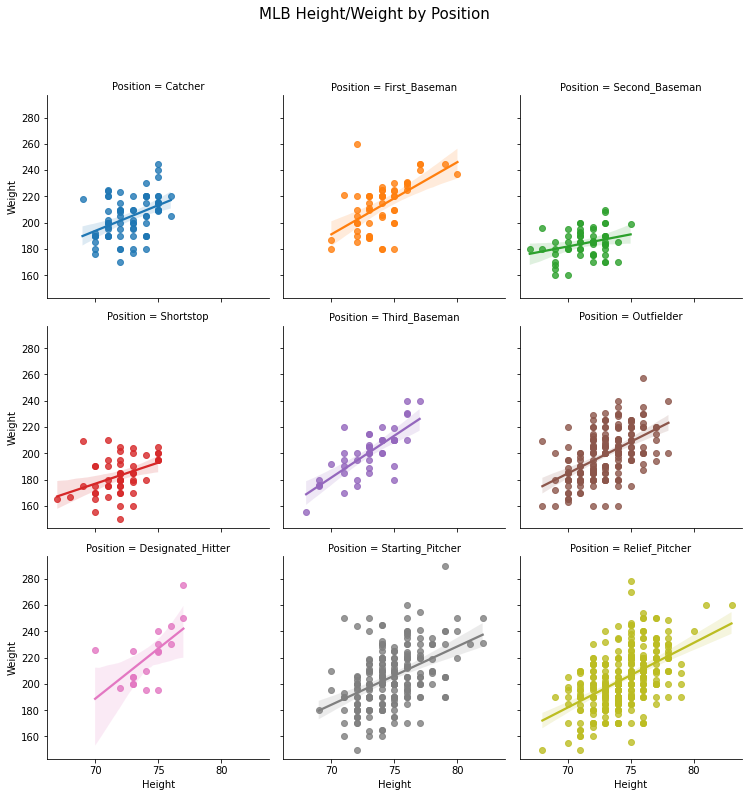

In [26]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Position", height=3.5, col_wrap=3, hue="Position")
g.fig.suptitle("MLB Height/Weight by Position", fontsize=15, y=1.05)
g.map(sns.regplot, "Height", "Weight")

In [29]:
#Modelling
#pip install -U scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
var = df['Height'].values
var.shape

(1033,)

In [31]:
y = df['Height'].values #Target
y = y.reshape(-1, 1)
X = df['Weight'].values #Feature(s)
X = X.reshape(-1,1)

In [32]:
X.shape

(1033, 1)

In [33]:
y.shape

(1033, 1)

In [34]:
#Split Data and Scale Data
scaler = StandardScaler()
X_scaler = scaler.fit(X)
X

array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [35]:
X = X_scaler.transform(X)
X

array([[-1.0337408 ],
       [ 0.6344091 ],
       [ 0.39610197],
       ...,
       [ 0.15779485],
       [-0.55712654],
       [-0.31881941]])

In [36]:
y_scaler = scaler.fit(y)
y

array([[74],
       [74],
       [72],
       ...,
       [75],
       [75],
       [73]], dtype=int64)

In [37]:
y = y_scaler.transform(y)
y

array([[ 0.13060176],
       [ 0.13060176],
       [-0.73699706],
       ...,
       [ 0.56440117],
       [ 0.56440117],
       [-0.30319765]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 1) (929, 1)
(104, 1) (104, 1)


In [39]:
#Fit the model
from sklearn.linear_model import Ridge
clf = Ridge()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [40]:
y_test.shape

(104, 1)

In [41]:
predictions.shape

(104, 1)

In [42]:
df_predictions = pd.DataFrame(predictions)
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000
